In [1]:
import seaborn as sns
iris = sns.load_dataset('iris')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
get_ipython().magic('matplotlib inline')

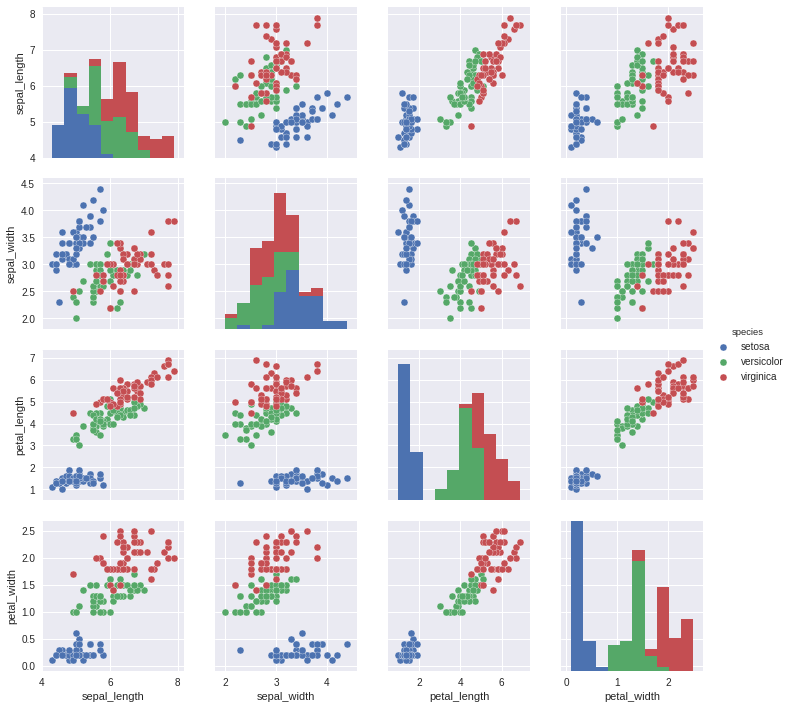

In [3]:
iris.head()
sns.pairplot(iris , hue='species')

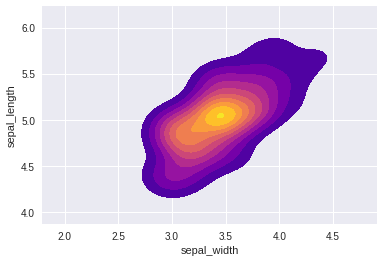

In [4]:
setosa = iris[iris['species']=='setosa']
sns.kdeplot( setosa['sepal_width'], setosa['sepal_length'],
                 cmap="plasma", shade=True, shade_lowest=False)

In [0]:
from sklearn.model_selection import train_test_split

X=iris.drop('species' , axis=1)
y=iris['species']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

In [0]:
from sklearn.svm import SVC
svm= SVC()
svm.fit(X_train,y_train)
pred=svm.predict(X_test)

In [8]:
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))
svm.score(X_test,y_test)

[[15  0  0]
 [ 0 17  0]
 [ 0  0 13]]
             precision    recall  f1-score   support

     setosa       1.00      1.00      1.00        15
 versicolor       1.00      1.00      1.00        17
  virginica       1.00      1.00      1.00        13

avg / total       1.00      1.00      1.00        45



1.0

In [9]:
from sklearn.model_selection import GridSearchCV
param_grid={'C': [0.1,1, 10, 100], 'gamma': [1,0.1,0.01,0.001]}
grid = GridSearchCV(SVC(),param_grid,refit=True,verbose=3)
grid.fit(X_train,y_train)
grid_predictions = grid.predict(X_test)
print(confusion_matrix(y_test,grid_predictions))
print(classification_report(y_test,grid_predictions))

Fitting 3 folds for each of 16 candidates, totalling 48 fits
[CV] C=0.1, gamma=1 ..................................................
[CV] ......... C=0.1, gamma=1, score=0.9722222222222222, total=   0.0s
[CV] C=0.1, gamma=1 ..................................................
[CV] ........................ C=0.1, gamma=1, score=1.0, total=   0.0s
[CV] C=0.1, gamma=1 ..................................................
[CV] ......... C=0.1, gamma=1, score=0.9117647058823529, total=   0.0s
[CV] C=0.1, gamma=0.1 ................................................
[CV] ....... C=0.1, gamma=0.1, score=0.8611111111111112, total=   0.0s
[CV] C=0.1, gamma=0.1 ................................................
[CV] ....... C=0.1, gamma=0.1, score=0.7714285714285715, total=   0.0s
[CV] C=0.1, gamma=0.1 ................................................
[CV] ....... C=0.1, gamma=0.1, score=0.7647058823529411, total=   0.0s
[CV] C=0.1, gamma=0.01 ...............................................
[CV] ...... C=0.

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  48 out of  48 | elapsed:    0.2s finished
